# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive
import random

# drive.mount('/content/drive')
# cwd = '/content/drive/MyDrive/Colab Notebooks/Lab01'
cwd = !pwd
cwd = cwd[0]

In [2]:
data_df = pd.read_csv(f'{cwd}/Worldometer-data-preprocessed/table_18-04-2022_preprocessed.csv')
data_df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Tests,Population,continent,Density
0,China,185035.0,2742.0,4641.0,3.0,151407.0,1637.0,28987.0,71.0,160000000.0,1.439324e+09,Asia,149.2199
1,USA,82383494.0,26881.0,1015821.0,109.0,80244093.0,41383.0,1123580.0,1438.0,996639125.0,3.344853e+08,North America,36.0000
2,India,43045527.0,1247.0,521996.0,31.0,42511701.0,928.0,11830.0,698.0,832104846.0,1.404347e+09,Asia,427.8611
3,Brazil,30261088.0,8470.0,662076.0,65.0,29262483.0,35432.0,336529.0,8318.0,63776166.0,2.152705e+08,South America,25.2888
4,France,27790834.0,19810.0,144205.0,48.0,25132351.0,217445.0,2514278.0,1541.0,260504402.0,6.553266e+07,Europe,118.8782


In [3]:
week_df = pd.read_csv(f'{cwd}/Worldometer-data-preprocessed/data_1_week.csv')
week_df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Tests,Population,continent,day,Density
0,China,185035.0,2742.0,4641.0,3.0,151407.0,1637.0,28987.0,71.0,160000000.0,1.439324e+09,Asia,18-04-2022,149.2199
1,USA,82383494.0,26881.0,1015821.0,109.0,80244093.0,41383.0,1123580.0,1438.0,996639125.0,3.344853e+08,North America,18-04-2022,36.0000
2,India,43045527.0,1247.0,521996.0,31.0,42511701.0,928.0,11830.0,698.0,832104846.0,1.404347e+09,Asia,18-04-2022,427.8611
3,Brazil,30261088.0,8470.0,662076.0,65.0,29262483.0,35432.0,336529.0,8318.0,63776166.0,2.152705e+08,South America,18-04-2022,25.2888
4,France,27790834.0,19810.0,144205.0,48.0,25132351.0,217445.0,2514278.0,1541.0,260504402.0,6.553266e+07,Europe,18-04-2022,118.8782


# Trực quan các mối quan hệ giữa các trường dữ liệu

## 1. Một trường đơn

### a) Total Cases

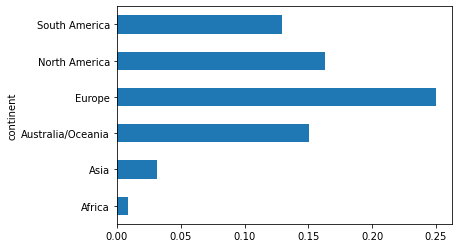

In [4]:
tcdf = data_df.groupby('continent')[['Total Cases', 'Population']].sum()
tcdf['Total Cases'] = tcdf['Total Cases']/tcdf['Population']
tcdf['Total Cases'].plot.barh();

Nhận xét: tổng số ca nhiễm ở châu Âu nhiều nhất

### b) Total Deaths

In [5]:
df = week_df.groupby(['continent', 'day'])[['Total Deaths']].sum()
df = df.reset_index()
df.head()

,continent,day,Total Deaths
0,Africa,18-04-2022,253519.0
1,Africa,19-04-2022,253559.0
2,Africa,20-04-2022,253596.0
3,Africa,21-04-2022,253667.0
4,Africa,22-04-2022,253681.0


ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (8).

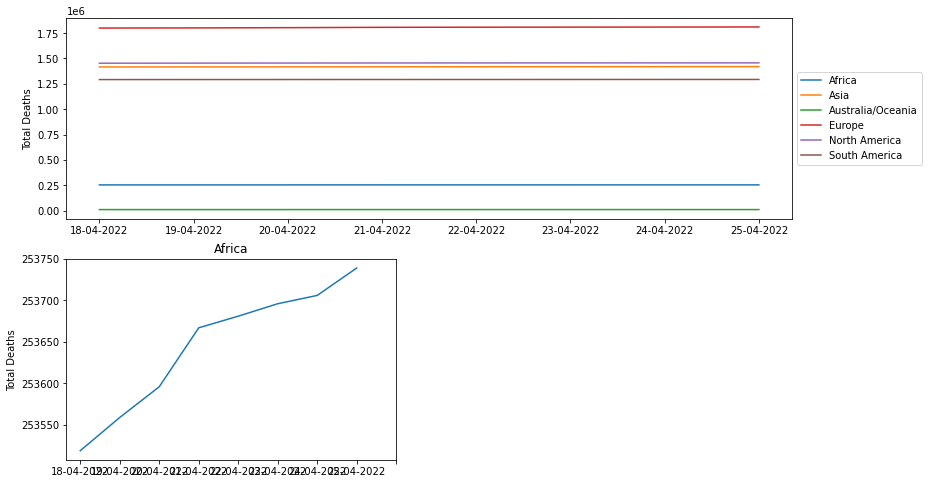

In [6]:
plt.figure(figsize=(13, 17))

ax = plt.subplot(4,2,(1,2))
sns.lineplot(data=df, x='day', y='Total Deaths', hue='continent', ax=ax);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
ax.set_xlabel('')

for i, continent in enumerate(df['continent'].unique(), 3):
  continent_df = df.loc[df['continent'] == continent, 'Total Deaths']
  ax = plt.subplot(4,2,i)

  continent_df = df.loc[df['continent'] == continent, ['day', 'Total Deaths']].set_index('day')
  continent_df.plot.line(ax=ax, legend=None, title=continent, ylabel='Total Deaths', xlabel='')
  # rút gọn xtick từ dd-mm-yyy về dd-mm
  xticks = ax.get_xticks() # [-1, 0, 1,...]
  trunc_labels = [d[0:5] for d in continent_df.index]
  plt.xticks(xticks[1:], trunc_labels);

Nhận xét: Tổng người chết (`Total Deaths`) của mỗi châu lục trong 1 tuần từ 18/4/2022 tới 25/4/2022 không có sự thay đổi rõ rệt, gần như chỉ tăng 1 lượng ít

### c) New Cases, New Deaths, New Recovered
- Ta sẽ xem xét 3 cột này trong 1 tuần, từ 18/4/2022 - 25/4/2022

In [ ]:
# data 18-04
df = data_df.groupby('continent')[['New Cases', 'New Deaths', 'New Recovered']].sum().reset_index()
df['day'] = 18

# data 25-04
df_25 = pd.read_csv(f'{cwd}/Worldometer-data-preprocessed/table_25-04-2022_preprocessed.csv')
df_25 = df_25.groupby('continent')[['New Cases', 'New Deaths', 'New Recovered']].sum().reset_index()
df_25['day'] = 25

df = pd.concat([df, df_25], axis=0)
df.head()

- Góc nhìn từ slope graph

In [ ]:
cols = ['New Cases', 'New Deaths', 'New Recovered']
continents = df['continent'].unique()
plt.figure(figsize=(16, 14))

for i, col in enumerate(cols, 1):
  ax = plt.subplot(1,3,i)
  for continent in continents:
    temp = df[df['continent'] == continent]
    plt.plot(temp['day'], temp[col], marker='o', markersize=5)
    plt.text(temp['day'].values[1]+0.1, temp[col].values[1], int(temp[col].values[1]))
    plt.text(temp['day'].values[0]-0.1, temp[col].values[0], int(temp[col].values[0]), va='center', ha='right')

  # x limits, x ticks
  plt.xlim(15.5, 27.5)
  plt.xticks([18, 25], ['18/04', '25/04'])

  # get y ticks, replace 1,000 with k, and draw the ticks
  yticks = plt.yticks()[0]
  plt.yticks([])

  # title
  plt.title(col)

  # grid
  ax.xaxis.grid(color='black', linestyle='solid', which='both', alpha=0.9)

  # remove spines
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['top'].set_visible(False)

  if i==3:
    plt.legend(continents, loc='center left', bbox_to_anchor=(0.8, 0.5));

Nhận xét: 
- `New Cases`:
- `New Deaths`
- `New Recovered`

- Góc nhìn từ area plot:

In [ ]:
## AREA PLOT: 3 subplot (mỗi cái đại diện cho 1 cột new/subplot, mỗi subplot chứa 7 đường tương ứng 7 châu) ##
plt.style.use('seaborn')
df = week_df.groupby(['continent', 'day'])[['New Cases', 'New Deaths', 'New Recovered']].agg(sum)

for i, col in enumerate(['New Cases', 'New Deaths', 'New Recovered'], 1):
  ax = plt.subplot(3,1,i)
  df_col = df[[col]].reset_index(0)
  df_col = df_col.pivot_table(values=col, index=df_col.index, columns='continent')
  df_col.plot.area(stacked=True, ax=ax, figsize=(12,20));
  plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

Nhận xét: ...

### d) New Deaths
- Ta sẽ xem xét cột này trong 1 tuần, từ 18/4/2022 - 25/4/2022

In [ ]:
df = week_df.groupby(['continent', 'day'])['New Deaths'].agg(sum)
df = df.reset_index()
df.head()

In [ ]:
new_death_mean = df['New Deaths'].mean()

df['New Deaths'].apply(lambda x: 'Extreme' if x > new_death_mean else )

## 2. Nhiều trường

### Total Deaths ~ Total Recovered

In [ ]:
df = data_df[['Country', 'Total Recovered', 'Total Deaths']].set_index('Country')
df['Total Deaths'] = df['Total Deaths']
df.head()

In [ ]:
plt.style.use('seaborn-whitegrid') # fast
_df = df.iloc[:30]
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = _df.index
fig, axes = plt.subplots(figsize=(15,13), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout() #adjusts subplot params so that subplots are nicely fit in the figure.

axes[0].barh(index, _df['Total Deaths'], align='center', color=color_red, zorder=10)
axes[0].set_title('Total Deaths (in millions)', fontsize=18, pad=2, color=color_red, **hfont)
axes[1].barh(index, _df['Total Recovered'], align='center', color=color_blue, zorder=10)
axes[1].set_title('Total Recovered (in millions)', fontsize=18, pad=2, color=color_blue, **hfont)
axes[0].invert_xaxis()
plt.gca().invert_yaxis()

axes[0].set(yticks=index, yticklabels=index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color

# thay đổi xticks labels
axes[1].set_xticks(np.array([10, 20, 30, 40, 50, 60, 70, 80])*1e6)
axes[1].yaxis.set_tick_params(size=0)
axes[1].set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80])

# thay đổi xticks labels
axes[0].set_xticks(axes[0].get_xticks()[1:])
axes[0].set_xticklabels([-1, 0.8, 0.6, 0.4, 0.2, 0])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)    

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95) #wspace=0 for no gap between the two axes

Nhận xét: ...

### Population ~ Total Recovered ~ Total Deaths

In [ ]:
# bar group chart
df = data_df[['Country', 'Total Recovered', 'Total Deaths', 'Population']][:30].set_index('Country')
df.plot.barh(figsize=(17,15))

In [ ]:
df.plot.scatter(x='Population', y='Total Recovered')

### Active Cases ~ Total Deaths ~ Total Recovered

In [ ]:
df = data_df.groupby('continent')[['Active Cases', 'Total Deaths', 'Total Recovered', 'Total Cases']].sum()
df['Active Cases'] = df['Active Cases'] / df['Total Cases']
df['Total Deaths'] = df['Total Deaths'] / df['Total Cases']
df['Total Recovered'] = df['Total Recovered'] / df['Total Cases']
df.drop(columns=['Total Cases'], inplace=True)
df.plot.barh(stacked=True);

Nhận xét: `Total Cases` cấu thành từ 3 phần: `Active Cases`, `Total Deaths` (chiếm ít nhất) & `Total Recovered` (chiếm nhiều nhất)

### `Total Cases` ~ (`Active Cases`, `Total Deaths`, `Total Recovered`)

- Ref: https://pbpython.com/waterfall-chart.html

In [ ]:
world_18 = data_df[['Total Cases', 'Active Cases', 'Total Deaths', 'Total Recovered']].sum()
df_25 = pd.read_csv(f'{cwd}/Worldometer-data-preprocessed/table_25-04-2022_preprocessed.csv')
world_25 = df_25[['Total Cases', 'Active Cases', 'Total Deaths', 'Total Recovered']].sum()

In [ ]:
df = world_18[['Total Cases']]
df = pd.concat([df,
                world_25[['Active Cases']] - world_18[['Active Cases']],
                world_25[['Total Deaths']] - world_18[['Total Deaths']],
                world_25[['Total Recovered']] - world_18[['Total Recovered']]])
df = pd.DataFrame(df, columns=['amount'])
df.rename({'Total Cases':'Total Cases (18/4)'}, inplace=True)
df

In [ ]:
blank= df['amount'].cumsum().shift(1).fillna(0)
total = df.sum().amount

df.loc["Total Cases (25/4)"] = total
blank.loc["Total Cases (25/4)"] = total

In [ ]:
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan
# step

In [ ]:
#When plotting the last element, we want to show the full bar
blank.loc["Total Cases (25/4)"] = 0

In [ ]:
plt.figure(figsize=(15,8))
ax = df.plot(kind='bar', stacked=True, bottom=blank, legend=None, title="Total Cases Progress", rot=0)
ax.plot(step.index, step.values, 'k')
# ax.set_ylim(bottom= 5.02 * 1e8);

y_height = df.amount.cumsum().shift(1).fillna(0)
max = df.max()
neg_offset = max / 400
pos_offset = max / 500
plot_offset = int(max / 15)
loop = 0
for index, row in df.iterrows():
    # For the last item in the list, we don't want to double count
    if row['amount'] == total:
        y = y_height[loop]
    else:
        y = y_height[loop] + row['amount']
    # Determine if we want a neg or pos offset
    if row['amount'] > 0:
        y += pos_offset
    else:
        y -= neg_offset
    ax.annotate("{:,.0f}".format(row['amount']),(loop,y),ha="center")
    loop+=1

#Scale up the y axis so there is room for the labels
ax.set_ylim(5 * 1e8, blank.max()+int(plot_offset));   

ax.get_children()[1].set_color('red')
ax.get_children()[0].set_color('cyan')
ax.get_children()[4].set_color('cyan')
ax.get_children()[3].set_color('green')

Nhận xét: ...

### Coi kỹ từng quan hệ giữa các cặp thuộc tính ['Active Cases', 'Total Deaths', 'Total Recovered', 'Total Cases']


In [ ]:
plt.figure(figsize=(15,10))
cols = ['Active Cases', 'Total Deaths', 'Total Recovered', 'Total Cases']
sns.pairplot(data_df[cols],kind='scatter');

Nhận xét: `Total Recovered` & `Total Cases` có quan hệ tuyến tính. Ta sẽ xem thử có mối quan hệ nhân quả giữa 2 trường này trong mục 3

- 1 cách tổng quan, ta sẽ vẽ scatter plot cho toàn bộ các trường dữ liệu

In [ ]:
df_calculate = data_df[data_df.columns[1:]]
sns.pairplot(df_calculate,kind='scatter')
plt.show()

Nhận xét: ...

### Active Cases & Total Recovered

## 3. Quan hệ nhân quả

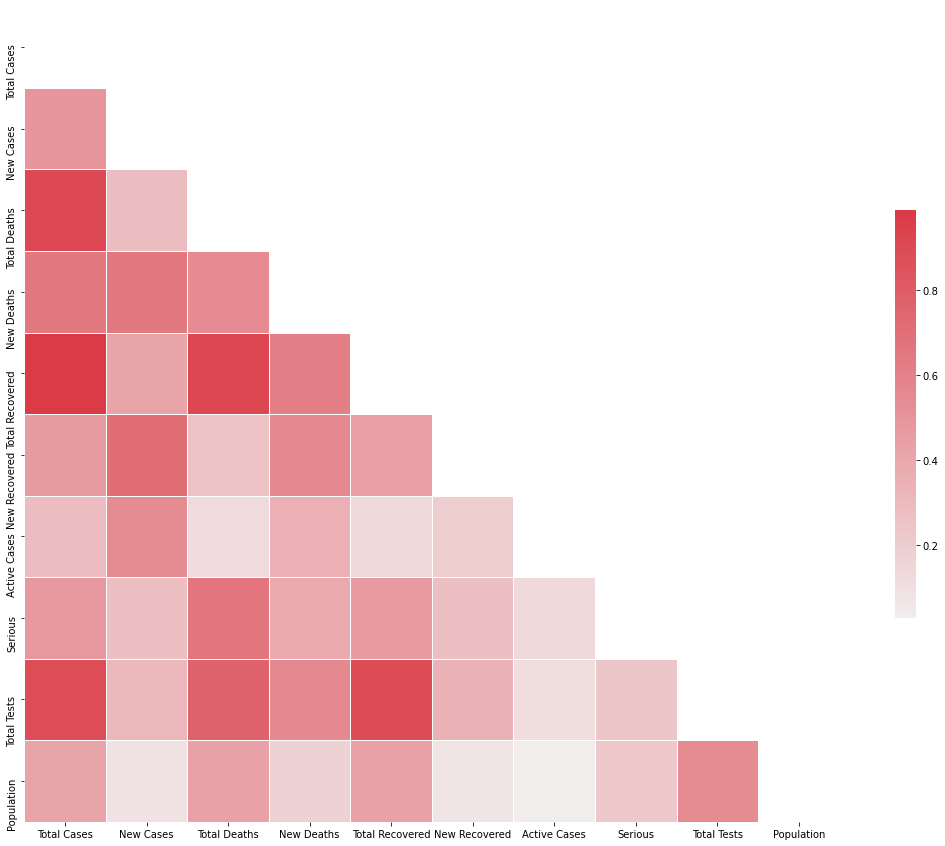

In [7]:
corr = week_df[week_df.columns[:-2]].corr()

mask = np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(20,15))

cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,linewidths=.5,cbar_kws={"shrink":0.5})

plt.show()

Chọn biểu đồ HeatMap vì đây là biểu đồ tốt nhất thể hiện được giá trị tương quan giữa các trường với nhau, giúp người nhìn vào có thể dễ dang hiểu được mà không bị quá phân tâm bởi các số liệu

Tính tương quan giữa các cột. Có thể thấy gần như các trường dữ liệu đều tỉ lệ thuận với nhau. Trường dữ liệu Total Cases ảnh hưởng rõ ràng nhất đối với các trường dữ liệu khác. Các cặp trường dữ liệu có ảnh hưởng nổi bật nhất là (Total Death,Total Case) (Total Death, Total Serious) ( Total Recovered, Active Case)( Total ReCovered, Total Tests)

Quan hệ nhân quả giữa newcase và newdeath

In [8]:
base = f'{cwd}/Worldometer-data/'
df_world_time = pd.DataFrame()

# tổng hợp và lưu tình hình số liệu cả thế iowis qua thời gian
  # từ ngày 18 đến ngày 28
for d in range(18,28,1):
  day = f'{d}-04-2022'
  name_temp = f'table_{day}_raw.csv'
  df_temp = pd.read_csv(base+name_temp)
  df_temp.drop(columns='Unnamed: 0', inplace=True)
  df = df_temp[df_temp['Country, Other'] == 'World']
  df['day'] = day
  df_world_time = pd.concat([df_world_time, df], axis=0)

# Chỉ lưu những cột cần lưu
df_world_time = df_world_time[['Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/1M pop', 'Deaths/1M pop','day']]

#Tiền xử lý các cột numeric
df_world_time[['New Cases', 'New Deaths', 'New Recovered']] = df_world_time[['New Cases', 'New Deaths', 'New Recovered']].applymap( \
                                              lambda x: x if x != x else float(x[1:].replace(',', '')))

cols = list(df_world_time)
num_cols = list(set(cols).difference(set(['New Cases', 'New Deaths', 'New Recovered', 'Country','day'])))
df_world_time[num_cols] = df_world_time[num_cols].applymap(lambda x: x if x != x else float(x.replace(',', '')))
df_world_time['day'] = pd.to_datetime(df_world_time['day'])
df_world_time.head()

/tmp/ipykernel_9633/163860779.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = day


(10, 15)


,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,day
0,505263460.0,355765.0,6225557.0,1483.0,456606790.0,1014825.0,42431113.0,42014.0,64821.0,798.7,2022-04-18
0,505899236.0,609820.0,6228605.0,2461.0,457920830.0,1314122.0,41749801.0,41934.0,64902.0,799.1,2022-04-19
0,506882550.0,918218.0,6232833.0,3324.0,458967501.0,1041435.0,41682216.0,41786.0,65028.0,799.6,2022-04-20
0,507828679.0,854280.0,6237649.0,3513.0,460009625.0,1017074.0,41581405.0,41814.0,65150.0,800.2,2022-04-21
0,508509728.0,681049.0,6240200.0,2551.0,460886526.0,876901.0,41383002.0,41727.0,65237.0,800.6,2022-04-22


/tmp/ipykernel_9633/3548727446.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_world_time['day'],rotation=45)


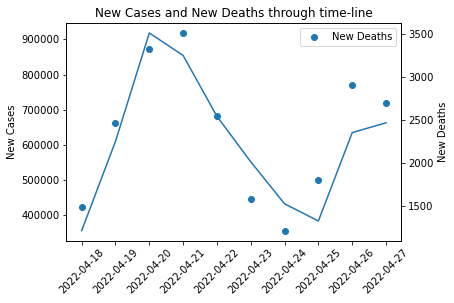

In [17]:
fig, ax1 = plt.subplots() 
  
# Vẽ biểu đồ có 2 trục tung để thế hiện 2 giá trị khác nhau
plt.title('New Cases and New Deaths through time-line')
ax1.set_ylabel('New Cases') 
plot_1 = ax1.plot(df_world_time['day'], df_world_time['New Cases'])
ax1.tick_params(axis ='y', labelcolor = 'black') 
ax1.set_xticklabels(df_world_time['day'],rotation=45)
#vẽ trục tung thứ 2
ax2 = ax1.twinx() 

ax2.set_ylabel('New Deaths') 
plot_2 = ax2.plot(df_world_time['day'],df_world_time['New Deaths'],'o',label = 'New Deaths')

plt.legend()
plt.show()

Chọn loại biểu đồ đường này bởi vì nó thể hiện tốt sự thay đổi của các giá trị theo thời gian. 

Có thể thấy dường như số ca nhiễm mới tăng thì số ca tử vong cũng tăng, còn những ngày số ca nhiễm mới giảm thì số ca tử vong cũng giảm theo, đây là nhìn chung số liệu của thế giới, vậy còn với các nước thì sao?

/home/duong/miniconda3/envs/hoc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Scatter plot show values of both New Deaths and New Cases every country in a week'}, xlabel='New Cases', ylabel='New Deaths'>

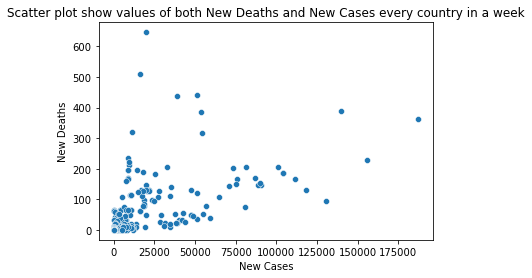

In [18]:
plt.title('Scatter plot show values of both New Deaths and New Cases every country in a week')
sns.scatterplot(week_df['New Cases'],week_df['New Deaths'])


Chọn biểu đồ scatter vì đây là biểu đồ tốt và đơn giản nhất để có thể thể hiện được mối quan hệ giữa 2 trường giá trị. Có thể lấy số liệu của 1 ngày để vẽ nhưng để có thể có cái nhìn rộng hơn, thì ta sẽ lấy số liệu của cả 1 tuần để có thể thể hiện rõ ràng hơn mối quan hệ của 2 trường dữ liệu

Khi nhìn vào tương quan giữa ca nhiễm mới và ca tử vong mới của các nước trong vòng 1 tuần thì có vẻ như là số ca nhiếm mới càng cao thì số ca tử vong mơi cũng có xu hướng tăng, nhưng khong phải là chính xác hoàn toàn, vậy còn yếu tố nào ảnh hưởng đến số ca tử vong mới?

/tmp/ipykernel_9633/2760250113.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_world_time['day'],rotation=45)


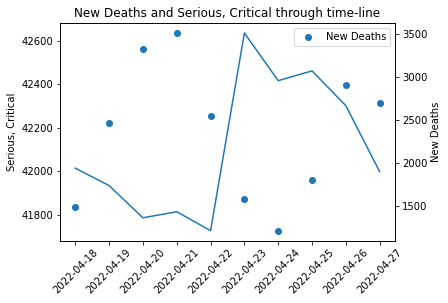

In [19]:
fig, ax1 = plt.subplots() 
  
plt.title('New Deaths and Serious, Critical through time-line')
ax1.set_ylabel('Serious, Critical') 
plot_1 = ax1.plot(df_world_time['day'], df_world_time['Serious, Critical'],label ='Serious, Critical')
ax1.tick_params(axis ='y', labelcolor = 'black') 
ax1.set_xticklabels(df_world_time['day'],rotation=45)

ax2 = ax1.twinx() 

  
ax2.set_ylabel('New Deaths') 
plot_2 = ax2.plot(df_world_time['day'],df_world_time['New Deaths'],'o',label = 'New Deaths')

plt.legend()
plt.show()

Tương tự biểu đồ trên, biểu đồ đường thể hiện tốt sự thay đổi của các giá trị theo thời gian.

Nhìn có vẻ như là New Deaths diễn biến chậm hơn Serious, Critical vài ngày. Có thể đúng bởi vì một người trong giai đoạn nguy hiểm chưa thể tử vong ngay được. Nhưng số liệu chưa đủ để có thể cho cái nhìn chính xác hơn 

Tạo cột TotalDeaths/TotalCases để có thể nhìn chung được tỉ lệ tử vong của các nước, qua đó một phần nào có thể đánh giá chất lượng y tế của các nước

In [12]:
data_df_temp = data_df.copy()
data_df_temp['TotalDeaths/TotalCases'] = data_df_temp['Total Deaths'] / data_df_temp['Total Cases'] 
data_df_temp['Predict New Deaths'] = data_df_temp['TotalDeaths/TotalCases'] * data_df_temp['New Cases']
data_df_temp.head()


,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Tests,Population,continent,Density,TotalDeaths/TotalCases,Predict New Deaths
0,China,185035.0,2742.0,4641.0,3.0,151407.0,1637.0,28987.0,71.0,160000000.0,1.439324e+09,Asia,149.2199,0.025082,68.774135
1,USA,82383494.0,26881.0,1015821.0,109.0,80244093.0,41383.0,1123580.0,1438.0,996639125.0,3.344853e+08,North America,36.0000,0.012330,331.453341
2,India,43045527.0,1247.0,521996.0,31.0,42511701.0,928.0,11830.0,698.0,832104846.0,1.404347e+09,Asia,427.8611,0.012127,15.121873
3,Brazil,30261088.0,8470.0,662076.0,65.0,29262483.0,35432.0,336529.0,8318.0,63776166.0,2.152705e+08,South America,25.2888,0.021879,185.313354
4,France,27790834.0,19810.0,144205.0,48.0,25132351.0,217445.0,2514278.0,1541.0,260504402.0,6.553266e+07,Europe,118.8782,0.005189,102.792923


/tmp/ipykernel_9633/3943916791.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_df_temp_1['Country'],rotation=90)


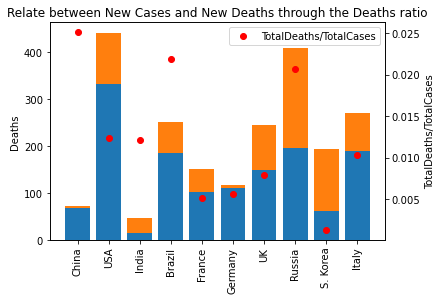

In [21]:
data_df_temp_1 = data_df_temp.head(10)

# Vẽ biểu đồ cột chồng giữa Predict New Deaths và New Deaths
fig, ax1 = plt.subplots() 
plt.title('Relate between New Cases and New Deaths through the Deaths ratio')
ax1.set_ylabel('Deaths') 
plot_1 = ax1.bar(data_df_temp_1['Country'],data_df_temp_1['Predict New Deaths'],label ='Predict New Deaths')
plot_2 = ax1.bar(data_df_temp_1['Country'],data_df_temp_1['New Deaths'],bottom= data_df_temp_1['Predict New Deaths'],label ='New Deaths')
ax1.tick_params(axis ='y', labelcolor = 'black') 
ax1.set_xticklabels(data_df_temp_1['Country'],rotation=90)
# Vẽ biểu đồ đường đẻ thể hiện tỉ lệ tử vong trung bình của các nước
ax2 = ax1.twinx() 
ax2.set_ylabel('TotalDeaths/TotalCases') 
plot_2 = ax2.plot(data_df_temp_1['Country'],data_df_temp_1['TotalDeaths/TotalCases'],'ro',label = 'TotalDeaths/TotalCases')
plt.legend()
plt.show()

Chọn biểu đồ cột vì nó thể hiện rõ được số liệu của các đối tượng riêng biệt. Sử dụng biểu đồ cột chồng để có thể thể hiện rõ được chênh lệch giữa số liệu thực và số liệu sự đoán. Dùng biểu đồ đường để có thể chỉ rõ thêm tỉ lệ tử vong.

Không thể thông qua tỉ lệ tử vong của các nước mà dự đoán số người tử vong theo ca mắc mới được, có thể do mỗi giai đoạn thì số ca nhiễm và tỉ lệ tử vong khác nhau, tùy chủng loại virus, số lượng Vaccine đã tiêm mà cho lại kết quả khác nhau theo thời gian dẫn đến sử dụng giá trị trung bình để tính không được chính xác.

=> Vậy chỉ có thể nói là sự thay đổi của số ca mắc mới có ảnh hưởng tới số ca tử vong mới thông qua một phần là số ca nghiêm trọng. Ngoài ra nó cũng không phải là nhân tố duy nhất ảnh hưởng đến số ca tử vong mới mà còn phụ thuộc vào nhiều yếu tố bên ngoài khác mà số liệu chưa chỉ rõ được.